# **La puntuacion Z:**
es la forma mas facil de estandarizar los datos, lo que permite comparar datos de diferentes escalas
En este ejemplo mediremos con el grado de felicidad de las personas(que esta entre 0 y 1) y de la cantidad de amigos que tienen en su cuenta de facebook en una muestra de 24 personas y se standarizara con el metodo preprocessing.scale del modulo sklearn

In [1]:
import pandas as pd

friends = [109, 1017, 1127, 418, 625, 957, 89, 950, 946, 797, 981, 125,
           455, 731, 1640, 485, 1309, 472, 1132, 1773, 906, 531, 742, 621]
happiness = [.8, .6, .3, .6, .6, .4, .8, .5, .4, .3, .3, .6, .2, .8,
             1, .6, .2, .7, .5, .3, .1, 0, .3, 1]

df = pd.DataFrame({'friends': friends, 'happiness': happiness})
df.head()


,friends,happiness
0,109,0.8
1,1017,0.6
2,1127,0.3
3,418,0.6
4,625,0.6


In [2]:
from sklearn import preprocessing

df_scaled = pd.DataFrame(preprocessing.scale(df), columns=['friends_scaled', 'happiness_scaled'])
df_scaled.head()


,friends_scaled,happiness_scaled
0,-1.599495,1.153223
1,0.536040,0.394939
2,0.794750,-0.742486
3,-0.872755,0.394939
4,-0.385909,0.394939


<AxesSubplot:xlabel='friends_scaled', ylabel='happiness_scaled'>

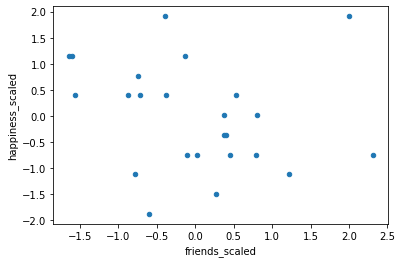

In [3]:
df_scaled.plot(kind='scatter', x='friends_scaled', y='happiness_scaled')


In [4]:
# para calcular lo ceficinetes de una correlacion lineal 
df.corr()   
# np.corrcoef(friends, happiness)

,friends,happiness
friends,1.000000,-0.216199
happiness,-0.216199,1.000000


# **Regla empirica**

In [25]:
# verificar si los datos de los amigos en facebook cumplen con la regla empirica

# porcentaje que esta a una derivacion estandar
print(
    'el porcentaje dentro de la 1er desviacion es :',
    df_scaled[(df_scaled['friends_scaled'] <= 1) & (df_scaled['friends_scaled'] >= -1)].shape[0] /
    float(24),
    '%')
print(
    'el porcentaje dentro de la 2da desviacion es :',
    df_scaled[(df_scaled['friends_scaled'] <= 2) & (df_scaled['friends_scaled'] >= -2)].shape[0] /
    float(24),
    '%')
print(
    'el porcentaje dentro de la 3era desviacion es :',
    df_scaled[(df_scaled['friends_scaled'] <= 3) & (df_scaled['friends_scaled'] >= -3)].shape[0] /
    float(24),
    '%')
# notar q a los DateFrame se le puede aplicar un filtro booleano y devuelve otro DateFrame Boolenao
#  que al unirlo con el DataFrame original solo obtenemos las filas que dieron True a la consulta


el porcentaje dentro de la 1er desviacion es : 0.75 %
el porcentaje dentro de la 2da desviacion es : 0.9166666666666666 %
el porcentaje dentro de la 3era desviacion es : 1.0 %


en este caso podemos decir que de manera genral esta muestra de amigos de facebook parecen seguir la distribucion normal por la regla empirica ya que dentro de la primera desviacion hay un % de 75 y la regla empirica nos dice q debe ser un 68 pero no son numeros tan diferentes analogamente dentro de la segunda desviacion hay 925 y la regla nos dice 95 y finalmente en la 3era desviacion estan todos los datos y en la regla nos hablan de un 99.7 